In [1]:
import osmnx as ox
import networkx as nx

ox.config(log_console=True, use_cache=True)

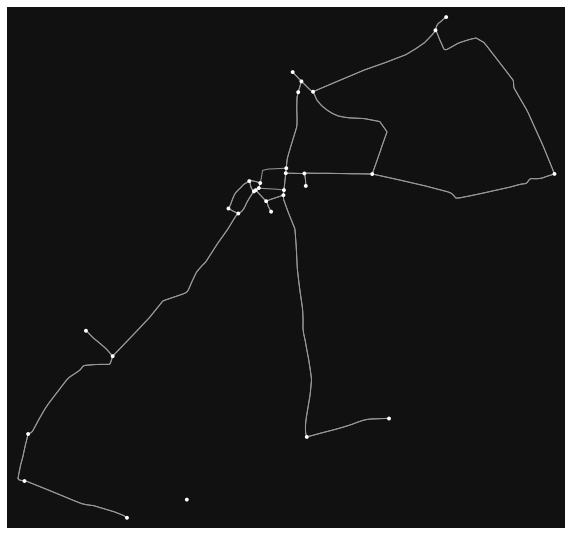

(<Figure size 720x7200 with 1 Axes>, <AxesSubplot:>)

In [2]:
aubagne_G = ox.graph_from_place('Aibes, France', network_type='drive', retain_all=True)
ox.plot_graph(aubagne_G, figsize=(10,100))

In [5]:
aubagne_G.edges()

OutMultiEdgeDataView([(599022953, 599022954), (599022953, 599299793), (599022953, 599036819), (599022954, 599022953), (599022954, 599022962), (599022962, 599022954), (599022962, 599036819), (599022962, 599036824), (599022963, 599036819), (599022963, 599022965), (599022963, 599036823), (599022965, 599022969), (599022965, 599022972), (599022965, 599022963), (599022969, 599022965), (599022972, 599036855), (599022972, 830389543), (599022972, 599022965), (599022979, 599022990), (599022979, 599036855), (599022979, 599036862), (599022990, 599023033), (599022990, 599022979), (599022990, 599022993), (599022993, 599022990), (599023033, 599023146), (599023033, 599023326), (599023033, 599022990), (599023128, 599023155), (599023145, 599036862), (599023145, 599023155), (599023146, 599023033), (599023146, 599023155), (599023146, 599023258), (599023155, 599023145), (599023155, 599023146), (599023155, 599023128), (599023258, 599023326), (599023258, 599023277), (599023258, 599023146), (599023277, 599023

In [6]:
# convert to simple graph
G = nx.Graph(aubagne_G)

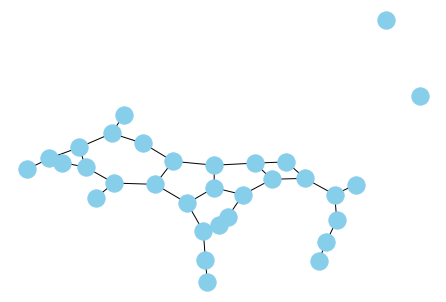

In [16]:
# nx.draw(aubagne_G, with_labels=False, node_color='#00CDE0')

nx.draw(G, with_labels=False, node_color='skyblue')

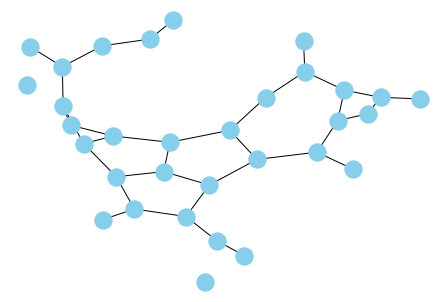

In [51]:
pos = nx.fruchterman_reingold_layout(G, k=0.3, seed=101)
nx.draw(G, pos=pos, with_labels=False, node_color='skyblue')

In [17]:
cycles = nx.cycle_basis(G)

In [18]:
len(cycles)

6

In [19]:
'68944745' in str(cycles)

False

In [12]:
type(cycles)

list

# Graphs tests

[[1, 6, 7, 0], [1, 2, 3, 4, 0]]


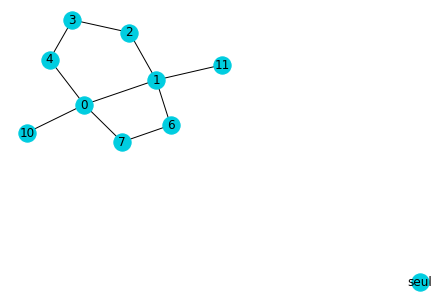

In [276]:
G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3, 4])
nx.add_cycle(G, [0, 1, 6, 7])
nx.add_path(G, [0,10])
nx.add_path(G, [1,11])
G.add_node("seul")
nx.draw(G, with_labels=True, node_color='#00CDE0')

print(nx.cycle_basis(G))

# Tentative de retrouver les polygones de la geodf depuis les IDs du cycle

In [126]:
# convert to simple graph
G = nx.Graph(aubagne_G)
aubagne_undirected_G = ox.utils_graph.get_undirected(aubagne_G)

In [127]:
cycles = nx.cycle_basis(G)

In [128]:
cycles

[[599036855, 599036823, 599036824, 599036862, 599022979],
 [599036855, 599022972, 599022965, 599022963, 599036823],
 [599022962, 599036819, 599022963, 599036823, 599036824],
 [599022962, 599022954, 599022953, 599036819],
 [599023033, 599023326, 599023258, 599023146],
 [599022990, 599023033, 599023146, 599023155, 599023145, 599036862, 599022979]]

In [129]:
edges_GDF = ox.utils_graph.graph_to_gdfs(aubagne_undirected_G, nodes=False, edges=True, fill_edge_geometry=True)

In [130]:
edges_GDF

osmid                                     name  \
0                46929941                         Rue de Quiévelon   
1   [46962425, 528337605]  [Chemin de Solrinnes, Chemin à la Bail]   
2               632132447                      Chemin de Solrinnes   
3                46929951                           Ruelle Fleurot   
4                46931656                                      NaN   
5                46931657                                      NaN   
6                46931658                                      NaN   
7                46929953                       Rue de la Fontaine   
8                46931658                                      NaN   
9                46929952             Rue de la Fontaine Prolongée   
10               46929953                       Rue de la Fontaine   
11              632132449                         Route de Jeumont   
12               46929939                Route de Solre-le-Château   
13               46929956                         Rue du Cimetière   
14              632132448                         Route de Jeumont   
15              632132448                         Route de Jeumont   
16               46929956                         Rue du Cimetière   
17               46929957                             Rue du Coron   
18               46929949                        Chemin du Bosquet   
19               46929950                        Route de Cousolre   
20              496150828                        Chemin de Marpent   
21               46929947                         Route de Jeumont   
22               46929947                         Route de Jeumont   
23               46929949                        Chemin du Bosquet   
24               46929959                       Chemin de Cousolre   
25               46929946                        Chemin de Coulmie   
26               46929946                        Chemin de Coulmie   
27   [46962429, 46931654]              Chemin de la Pâture Enragée   
28               46962425                         Chemin à la Bail   
29               46962429              Chemin de la Pâture Enragée   
30              377700356                                      NaN   
31               46931659                                      NaN   
32              134928979                                Rue Basse   
33              528325915                       Chemin de Bérelles   
34              528327119               Chemin du Bois des Tailles   

         highway  oneway    length  \
0   unclassified   False    61.575   
1   unclassified   False  1087.717   
2   unclassified   False   154.062   
3    residential   False   198.518   
4    residential   False    64.865   
5    residential   False    64.234   
6    residential   False    12.271   
7    residential   False    84.853   
8    residential   False    20.697   
9    residential   False    65.331   
10   residential   False   102.046   
11     secondary   False    28.586   
12     secondary   False  1372.525   
13   residential   False   104.158   
14     secondary   False    94.938   
15     secondary   False    28.207   
16   residential   False   379.263   
17   residential   False    70.259   
18  unclassified   False   756.751   
19  unclassified   False  1067.186   
20  unclassified   False    71.297   
21     secondary   False   433.618   
22     secondary   False    62.995   
23  unclassified   False    87.392   
24  unclassified   False   775.306   
25  unclassified   False  1201.574   
26  unclassified   False    98.418   
27  unclassified   False   296.540   
28  unclassified   False   692.738   
29  unclassified   False   611.061   
30   residential   False    28.972   
31   residential    True   140.969   
32   residential    True   205.726   
33  unclassified   False   206.627   
34  unclassified   False   473.828   

                                             geometry       from         to  \
0   LINESTRING (4.08974 50.23565, 4.08983 50.23562.

In [131]:
edges_GDF[edges_GDF.name == "Rue de Quiévelon"]

osmid              name       highway  oneway  length  \
0  46929941  Rue de Quiévelon  unclassified   False  61.575   

                                            geometry       from         to  \
0  LINESTRING (4.08974 50.23565, 4.08983 50.23562...  599022954  599022953   

   ref          u          v  key  
0  NaN  599022953  599022954    0

In [132]:
c = cycles[0]

In [133]:
c1_GDF = edges_GDF.query(f"u in ({cycles[0]}) and v in ({cycles[0]})")

In [134]:
c1_GDF

osmid              name      highway  oneway   length  \
14  632132448  Route de Jeumont    secondary   False   94.938   
15  632132448  Route de Jeumont    secondary   False   28.207   
30  377700356               NaN  residential   False   28.972   
31   46931659               NaN  residential    True  140.969   
32  134928979         Rue Basse  residential    True  205.726   

                                             geometry       from         to  \
14  LINESTRING (4.09410 50.23658, 4.09412 50.23669...  599036855  599022979   
15  LINESTRING (4.09428 50.23768, 4.09427 50.23761...  599036862  599022979   
30    LINESTRING (4.09223 50.23693, 4.09212 50.23668)  599036824  599036823   
31  LINESTRING (4.09410 50.23658, 4.09353 50.23662...  599036855  599036823   
32  LINESTRING (4.09223 50.23693, 4.09232 50.23719...  599036824  599036862   

      ref          u          v  key  
14  D 963  599022979  599036855    0  
15  D 963  599022979  599036862    0  
30    NaN  599036823  599036824    0  
31    NaN  599036823  599036855    0  
32    NaN  599036824  599036862    0

<AxesSubplot:>

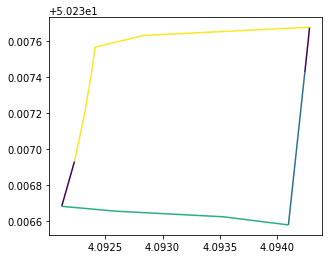

In [138]:
c1_GDF.plot(column="length")

<AxesSubplot:>

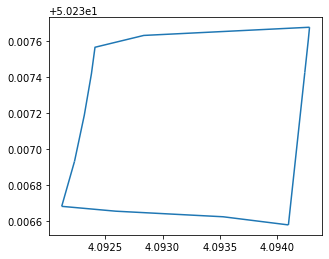

In [142]:
c1_GDF.dissolve(by="key").plot()

In [95]:
from shapely.ops import polygonize_full
p, d, c, i = polygonize_full(edges_GDF.geometry)

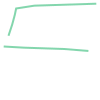

In [103]:
d

In [58]:
edges_GDF.query("osmid == 46929941").geometry.apply()

array(['LINESTRING (4.0905079 50.2354027, 4.0901398 50.2355109, 4.0898276 50.2356182, 4.0897351 50.2356516)',
       'LINESTRING (4.0897351 50.2356516, 4.0898276 50.2356182, 4.0901398 50.2355109, 4.0905079 50.2354027)'],
      dtype=object)

In [89]:
nodes_GDF

y         x      osmid                  geometry
596448116  50.249383  4.093937  596448116  POINT (4.09394 50.24938)
599022953  50.235403  4.090508  599022953  POINT (4.09051 50.23540)
599022954  50.235652  4.089735  599022954  POINT (4.08974 50.23565)
599022962  50.237032  4.091374  599022962  POINT (4.09137 50.23703)
599022963  50.236576  4.091881  599022963  POINT (4.09188 50.23658)
599022965  50.236021  4.092698  599022965  POINT (4.09270 50.23602)
599022969  50.235494  4.093086  599022969  POINT (4.09309 50.23549)
599022972  50.236322  4.094053  599022972  POINT (4.09405 50.23632)
599022979  50.237427  4.094239  599022979  POINT (4.09424 50.23743)
599022990  50.237414  4.095702  599022990  POINT (4.09570 50.23741)
599022993  50.236788  4.095813  599022993  POINT (4.09581 50.23679)
599023033  50.237384  4.101032  599023033  POINT (4.10103 50.23738)
599023128  50.242510  4.094781  599023128  POINT (4.09478 50.24251)
599023145  50.241500  4.095216  599023145  POINT (4.09522 50.24150)
599023146  50.241522  4.096381  599023146  POINT (4.09638 50.24152)
599023155  50.242043  4.095468  599023155  POINT (4.09547 50.24204)
599023258  50.244610  4.106001  599023258  POINT (4.10600 50.24461)
599023277  50.245273  4.106842  599023277  POINT (4.10684 50.24527)
599023326  50.237392  4.115351  599023326  POINT (4.11535 50.23739)
599036719  50.224319  4.073998  599036719  POINT (4.07400 50.22432)
599036728  50.221956  4.073713  599036728  POINT (4.07371 50.22196)
599036745  50.220109  4.081763  599036745  POINT (4.08176 50.22011)
599036819  50.236514  4.091739  599036819  POINT (4.09174 50.23651)
599036823  50.236681  4.092121  599036823  POINT (4.09212 50.23668)
599036824  50.236932  4.092233  599036824  POINT (4.09223 50.23693)
599036855  50.236578  4.094096  599036855  POINT (4.09410 50.23658)
599036862  50.237679  4.094280  599036862  POINT (4.09428 50.23768)
599299735  50.221021  4.086464  599299735  POINT (4.08646 50.22102)
599299793  50.228232  4.080639  599299793  POINT (4.08064 50.22823)
599299858  50.225097  4.102351  599299858  POINT (4.10235 50.22510)
599299980  50.229510  4.078538  599299980  POINT (4.07854 50.22951)
830389543  50.224172  4.095892  830389543  POINT (4.09589 50.22417)

In [95]:
join_GDF = gpd.sjoin(nodes_GDF, edges_GDF)

In [94]:
join_GDF.query("osmid_left == 599022953")

y         x  osmid_left                  geometry  \
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   

           index_right            osmid_right  \
599022953          1.0  [46962425, 528337605]   
599022953         61.0  [46962425, 528337605]   
599022953          0.0               46929941   
599022953          3.0               46929941   
599022953          2.0              632132447   
599022953         50.0              632132447   

                                              name       highway oneway  \
599022953  [Chemin à la Bail, Chemin de Solrinnes]  unclassified  False   
599022953  [Chemin à la Bail, Chemin de Solrinnes]  unclassified  False   
599022953                         Rue de Quiévelon  unclassified  False   
599022953                         Rue de Quiévelon  unclassified  False   
599022953                      Chemin de Solrinnes  unclassified  False   
599022953                      Chemin de Solrinnes  unclassified  False   

             length  ref            u            v  key  
599022953  1087.717  NaN  599022953.0  599299793.0  0.0  
599022953  1087.717  NaN  599299793.0  599022953.0  0.0  
599022953    61.575  NaN  599022953.0  599022954.0  0.0  
599022953    61.575  NaN  599022954.0  599022953.0  0.0  
599022953   154.062  NaN  599022953.0  599036819.0  0.0  
599022953   154.062  NaN  599036819.0  599022953.0  0.0

In [91]:
join_GDF

y         x  osmid_left                  geometry  \
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   
599299793  50.228232  4.080639   599299793  POINT (4.08064 50.22823)   
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   
599299793  50.228232  4.080639   599299793  POINT (4.08064 50.22823)   
599022953  50.235403  4.090508   599022953  POINT (4.09051 50.23540)   
...              ...       ...         ...                       ...   
599299980  50.229510  4.078538   599299980  POINT (4.07854 50.22951)   
599299858  50.225097  4.102351   599299858  POINT (4.10235 50.22510)   
830389543  50.224172  4.095892   830389543  POINT (4.09589 50.22417)   
599299858  50.225097  4.102351   599299858  POINT (4.10235 50.22510)   
830389543  50.224172  4.095892   830389543  POINT (4.09589 50.22417)   

           index_right            osmid_right  \
599022953            1  [46962425, 528337605]   
599299793            1  [46962425, 528337605]   
599022953           61  [46962425, 528337605]   
599299793           61  [46962425, 528337605]   
599022953            0               46929941   
...                ...                    ...   
599299980           63              528325915   
599299858           67              528327119   
830389543           67              528327119   
599299858           64              528327119   
830389543           64              528327119   

                                              name       highway  oneway  \
599022953  [Chemin à la Bail, Chemin de Solrinnes]  unclassified   False   
599299793  [Chemin à la Bail, Chemin de Solrinnes]  unclassified   False   
599022953  [Chemin à la Bail, Chemin de Solrinnes]  unclassified   False   
599299793  [Chemin à la Bail, Chemin de Solrinnes]  unclassified   False   
599022953                         Rue de Quiévelon  unclassified   False   
...                                            ...           ...     ...   
599299980                       Chemin de Bérelles  unclassified   False   
599299858               Chemin du Bois des Tailles  unclassified   False   
830389543               Chemin du Bois des Tailles  unclassified   False   
599299858               Chemin du Bois des Tailles  unclassified   False   
830389543               Chemin du Bois des Tailles  unclassified   False   

             length  ref          u          v  key  
599022953  1087.717  NaN  599022953  599299793    0  
599299793  1087.717  NaN  599022953  599299793    0  
599022953  1087.717  NaN  599299793  599022953    0  
599299793  1087.717  NaN  599299793  599022953    0  
599022953    61.575  NaN  599022953  599022954    0  
...             ...  ...        ...        ...  ...  
599299980   206.627  NaN  599299793  599299980    0  
599299858   473.828  NaN  830389543  599299858    0  
830389543   473.828  NaN  830389543  599299858    0  
599299858   473.828  NaN  599299858  830389543    0  
830389543   473.828  NaN  599299858  830389543    0  

[136 rows x 14 columns]

In [22]:
aubagne_GDF.head()

y         x      osmid                  geometry
596448116  50.249383  4.093937  596448116  POINT (4.09394 50.24938)
599022953  50.235403  4.090508  599022953  POINT (4.09051 50.23540)
599022954  50.235652  4.089735  599022954  POINT (4.08974 50.23565)
599022962  50.237032  4.091374  599022962  POINT (4.09137 50.23703)
599022963  50.236576  4.091881  599022963  POINT (4.09188 50.23658)

In [54]:
cycle1 = aubagne_GDF.query(f"osmid in ({cycles[0]})")

In [72]:
from shapely import geometry
import geopandas as gpd

def get_poly(cycles):
    return (
        geometry.Polygon(aubagne_GDF.loc[osmid].geometry for osmid in cycle)
        for cycle in cycles
    )

polygons=list(get_poly(cycles))
polygons_gdf = gpd.GeoDataFrame(geometry=polygons, crs="epsg:4326")

<AxesSubplot:>

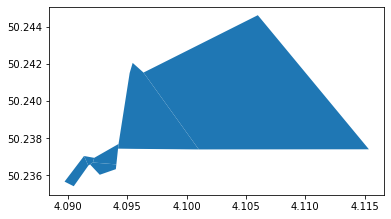

In [74]:
polygons_gdf.plot()

In [77]:
polygons_gdf.to_file("data/aibes-mailles.geojson", driver='GeoJSON')